In [1]:
#          ,  ,
#          \\ \\           
#          ) \\ \\    _p_ 
#          )^\))\))  /  *\ 
#           \_|| || / /^`-'  MOD 3
#  __       -\ \\--/ /     PROJECT
#<'  \\___/   ___. )'     FLATIRON
#     `====\ )___/\\        SCHOOL
#          //     `"          DATA
#          \\    /  \      SCIENCE
#          `"

In [2]:
# from rests_vs_violations import rests_vs_violations
# from rodents import rodents_per_violation
# from get_weather import get_weather
# from day_of_week import day_of_week

In [3]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import linregress

In [4]:
%run py_files/rests_vs_violations.py
%run py_files/rodents.py
%run py_files/get_weather.py
%run py_files/day_of_week.py

# The Data:

Sources:
- **DOHMH New York City Restaurant Inspection Results**
    - From 2017-06-01 through 2019-06-05
    - 268,458 health code violations
    - 84,576 inspections
    - 20,697 retaurants
    - https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j
- **Dark Sky API**
    - Weather data for the 641 dates where inspections occured during those two years
    - https://darksky.net/dev
- **311 Service Requests from 2010 to Present**
    - Used API to receive 254,171 rodent-related complaints
    - https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
    - https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv

# Hypothesis 1: The more locations of a restaurant, the lower the code violation score

Linear Regression Restaurant Count vs Restaurant Score:
LinregressResult(slope=-13.986080824722695, intercept=226.93800875658138, rvalue=-0.35749812511617146, pvalue=0.015910647053584154, stderr=5.571791497202854)


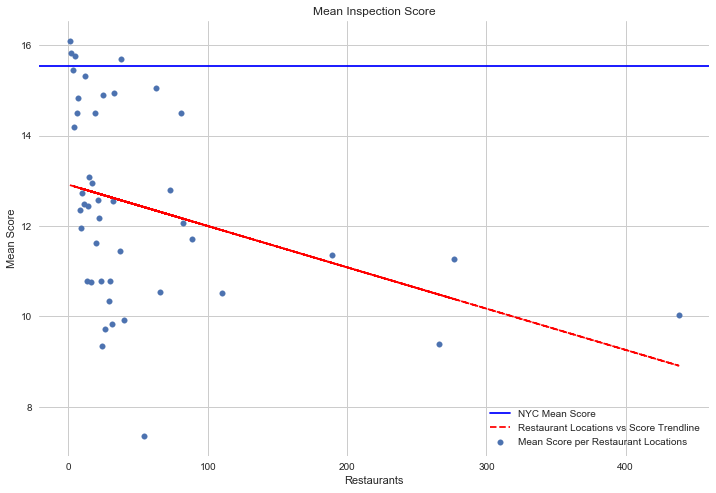

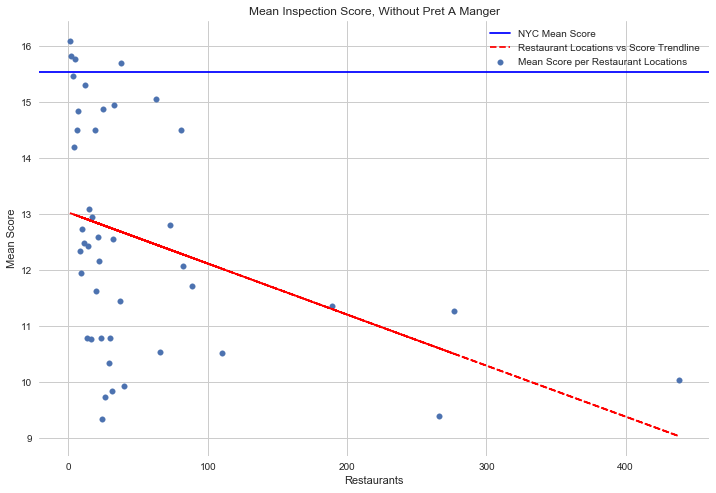

Linear Regression Restaurant Count vs Restaurant Score without Pret A Manger:
LinregressResult(slope=-0.009123677523955136, intercept=13.02674842554089, rvalue=-0.3823371977177391, pvalue=0.01042935792688957, stderr=0.0034023692912831887)
                            OLS Regression Results                            
Dep. Variable:                  meany   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     7.191
Date:                Tue, 11 Jun 2019   Prob (F-statistic):             0.0104
Time:                        11:57:03   Log-Likelihood:                -89.732
No. Observations:                  44   AIC:                             183.5
Df Residuals:                      42   BIC:                             187.0
Df Model:                           1                                         
Covariance Type:            nonrobust             

In [5]:
rests_vs_violations()

## Result of testing Hypothesis 1
The p-value **with** Pret A Manger, which seems like an outlier, is 0.016. With it removed from the dataset, the p-value is 0.010. Both are below 0.05, which would allow us to reject the null hypothesis.

# Hypothesis 2: The more rodent complaints in a zipcode, the higher the rodent violations in an inspection in that zipcode

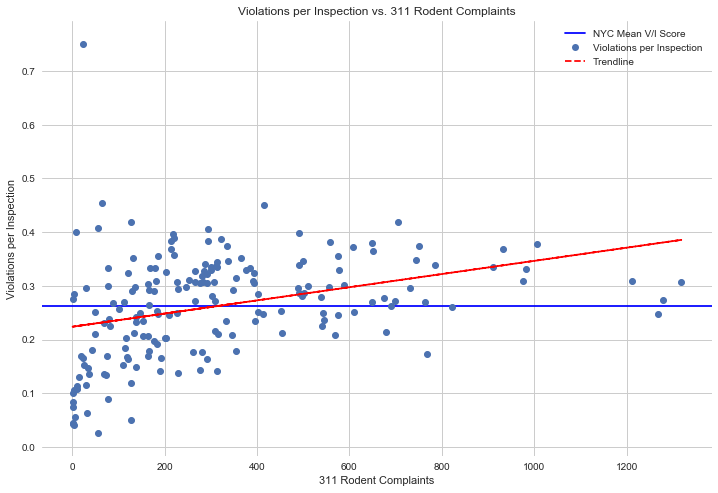

                            OLS Regression Results                            
Dep. Variable:           vio_per_insp   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     24.12
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           2.00e-06
Time:                        11:35:02   Log-Likelihood:                 178.92
No. Observations:                 185   AIC:                            -353.8
Df Residuals:                     183   BIC:                            -347.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2239      0.010     21.520      0.0

In [33]:
rodents_per_violation()

## Result of testing Hypothesis 2
We can reject the null hypothesis based on the results from statsmodel

# Hypothesis 3:  Bad weather leads to more infractions during a restaurant inspections in NYC

The mean score on days with precipitation is  15.6
With a standard deviation of  11.977
The mean score on days without precipitation is  15.48
With a standard deviation of  11.66
The t-stat is 1.414 and the the p value is 0.157.


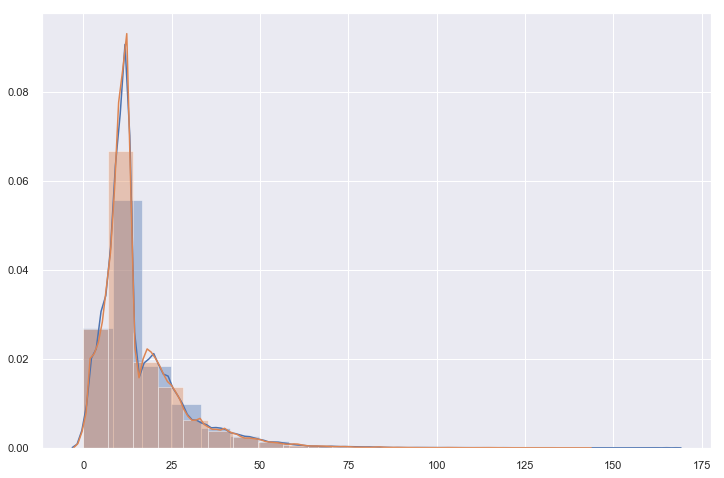

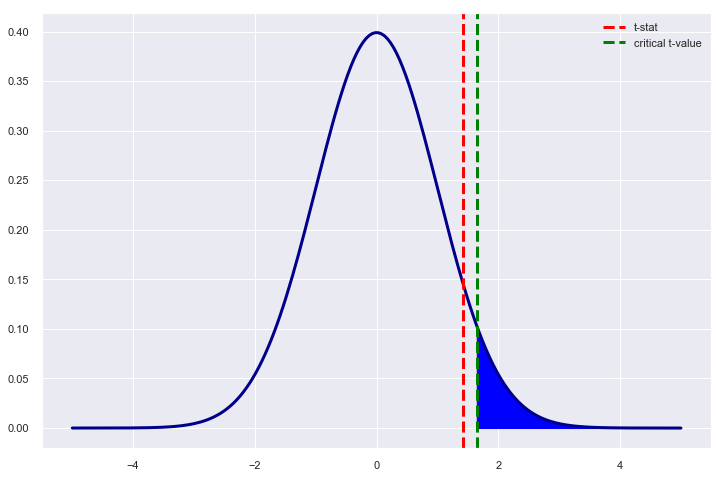

The critical value of 1.6449 is larger than the t-statistic of 1.414, with a p-value of 0.157. Therefore we fail to reject the null hypothesis.


In [34]:
get_weather()

## Result of testing Hypothesis 3

The critical value of 1.6449 is larger than the t-statistic of 1.414, with a p-value of 0.157. Therefore we fail to reject the null hypothesis.


# Hypothesis 4: NYC resaurants are more likely to get to be cited for a greater number of infractions at the beginning of the week

The mean inspection score for Monday's and Tuesday's is  15.564
With a standard deviation of  11.671
The mean inspection score for Thursday's and Friday's is  15.356
With a standard deviation of  11.794
The t-stat is 2.213 and the the p value is 0.0269.


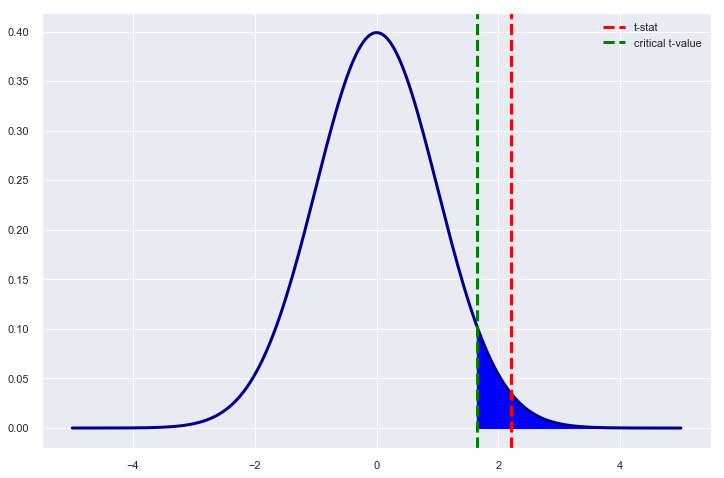

The critical value of 1.6449 is less than the t-statistic of 2.2132753769214997, with a p-value of 0.026882281413865797. Therefore we are able to reject the null hypothesis.


In [35]:
day_of_week()

## Result of testing hypothesis 4:

The critical value of 1.6449 is less than the t-statistic of 2.2132753769214997, with a p-value of 0.026882281413865797. Therefore we are able to reject the null hypothesis.